In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from spont_rec_spacing import spont_rec
from extn_rw_models import *
from plotnine import *

In [2]:
model = refined
#model = revised_CompAct
save_plots = True
perform_oat = False
print(model.pars)

par_vals = {'refined': [0.01, 0.2, 1.5, 5.0],
            'revised_CompAct': [0.01, 1.0, 0.1, 8.0, 1.0, 5]}

            min   max  default
drate       0.0   0.5     0.25
lrate_min   0.0   0.5     0.10
power       0.0   2.0     0.50
resp_scale  0.0  10.0     1.00


In [3]:
if perform_oat:
    oat_result = sr.perform_oat(experiment = spont_rec,
                                model = model,
                                oat = 'context_effect',
                                minimize = True,
                                n = 1)
    print(np.round(oat_result[0], 4))
    print(np.round(oat_result[1], 4))

In [4]:
trials = spont_rec.make_trials('spaced_immediate')
ds_di = model.simulate(trials, par_vals[model.name])

trials = spont_rec.make_trials('spaced_delay')
ds_dd = model.simulate(trials, par_vals[model.name])

trials = spont_rec.make_trials('control_immediate')
ds_si = model.simulate(trials, par_vals[model.name])

trials = spont_rec.make_trials('control_delay')
ds_sd = model.simulate(trials, par_vals[model.name])

print('spontaneous recovery (spaced)')
print(spont_rec.oats['spont_rec'].compute_total({'immediate': ds_di, 'delay': ds_dd}))
print(spont_rec.oats['spont_rec'].mean_resp({'immediate': ds_di, 'delay': ds_dd}))

print('\nspontaneous recovery (control)')
print(spont_rec.oats['spont_rec'].compute_total({'immediate': ds_si, 'delay': ds_sd}))
print(spont_rec.oats['spont_rec'].mean_resp({'immediate': ds_si, 'delay': ds_sd}))

spontaneous recovery (spaced)
0.08264519969788209
    schedule     trial_name u_name  mean_resp
0      delay  cs -> nothing     us   0.598467
0  immediate  cs -> nothing     us   0.515822

spontaneous recovery (control)
0.13418098031795145
    schedule     trial_name u_name  mean_resp
0      delay  cs -> nothing     us   0.659187
0  immediate  cs -> nothing     us   0.525006


  test_context  test_time         b
0       spaced  immediate  0.502637
1       spaced      delay  0.516411
2      control  immediate  0.504168
3      control      delay  0.526531


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 4 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_spont_rec_spacing_b_refined.jpeg


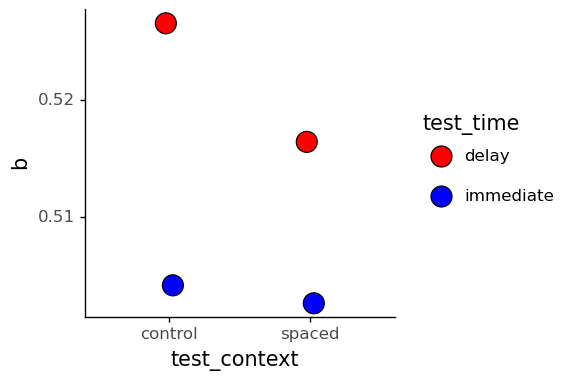

In [5]:
df = pd.DataFrame({'test_context': ['spaced', 'spaced', 'control', 'control'],
                   'test_time': ['immediate', 'delay', 'immediate', 'delay'],
                   'b': np.array([ds_di['b'].loc[{'t': ds_di['stage_name'] == 'test'}].mean().values,
                         ds_dd['b'].loc[{'t': ds_dd['stage_name'] == 'test'}].mean().values,
                         ds_si['b'].loc[{'t': ds_si['stage_name'] == 'test'}].mean().values,
                         ds_sd['b'].loc[{'t': ds_sd['stage_name'] == 'test'}].mean().values], dtype = 'float')})
print(df)

plot_b = ggplot(df, aes(x = 'test_context', fill = 'test_time', y = 'b'))
plot_b += scale_fill_manual(values = {'delay': 'red', 'immediate': 'blue'})
plot_b += geom_point(size = 8, position = position_dodge(width = 0.1))
plot_b += theme_classic(base_size = 15)
plot_b += theme(figure_size = (4, 4))
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_spont_rec_spacing_b_' + model.name + '.jpeg', dpi = 300)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 7 x 3 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_spont_rec_spacing_w_refined.jpeg


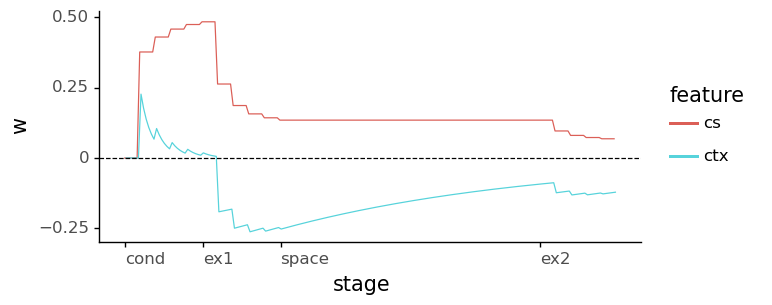

In [6]:
plot_w = sr.learn_plot(ds_dd,
                       var = 'w',
                       rename_coords = {'f_name': 'feature'},
                       sel = {'t': ds_dd['stage_name'].isin(['cond', 'ex1', 'space', 'ex2']), 'f_name': ['cs', 'ctx']},
                       figure_size = (7, 3))
plot_w += geom_hline(yintercept = 0, linetype = 'dashed')
plot_w += theme(axis_text_x = element_text(ha = 'left'))
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_spont_rec_spacing_w_' + model.name + '.jpeg', dpi = 300)